In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Customer-Churn.csv")
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.head(5)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
# Note that Total Charges is a string
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
# Ignore the errors (non numeric values), put null there
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
# Display rows with null Total charges
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

#### Since there are only 11 rows out of thousands, we can drop these rows. 

In [8]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/tmp/ipykernel_4743/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
df1.TotalCharges.dtypes

dtype('float64')

#### We can see there are no other rows have any null values, hence Data Cleaning is done.  
#### We should now perform EDA and visualise our data

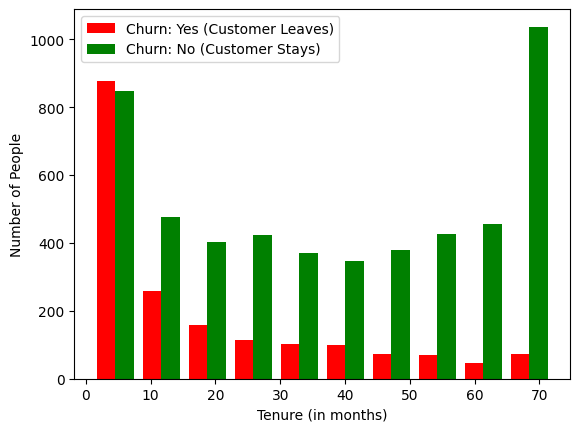

In [12]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color = ['red', 'green'], 
         label=['Churn: Yes (Customer Leaves)', 'Churn: No (Customer Stays)'])
plt.legend()
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of People')
plt.show()

#### We can see that as time passes by, people don't leave the company very easily and hence large tenure corresponds to less number of people leaving the company. 

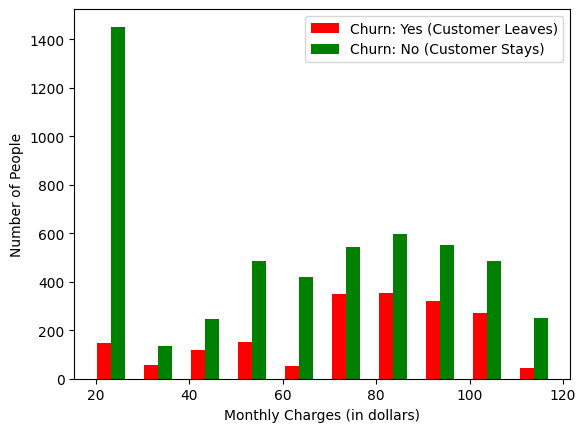

In [13]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], color = ['red', 'green'], rwidth=0.6, 
         label=['Churn: Yes (Customer Leaves)', 'Churn: No (Customer Stays)'])
plt.legend()
plt.xlabel('Monthly Charges (in dollars)')
plt.ylabel('Number of People')
plt.show()

#### People with higher monthly charges have a higher chance of leaving as compared to people with lesser charges

### Now Let us modify data and perform feature engineering

In [14]:
# Let us check all categorical variables
def displayCategories():
    categoricalcolumns = []
    for column in df1:
        if df1[column].dtypes=='object':
            categoricalcolumns.append(column)
            print(f'{column}: {df1[column].unique()}')
    return categoricalcolumns

In [15]:
displayCategories()

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [16]:
# Note that in certain columns, the lack of service can be replaced with No
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)
displayCategories()

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


/tmp/ipykernel_4743/715422019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
/tmp/ipykernel_4743/715422019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [17]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for column in yes_no_columns:
    df1[column] = df1[column].replace({'Yes':1, 'No':0})
displayCategories()

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


/tmp/ipykernel_4743/447246526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column].replace({'Yes':1, 'No':0})


['gender', 'InternetService', 'Contract', 'PaymentMethod']

In [18]:
df1['gender'] = df1['gender'].replace({'Female':1, 'Male':0})
df1['gender'].unique()

/tmp/ipykernel_4743/438738432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'] = df1['gender'].replace({'Female':1, 'Male':0})


array([1, 0])

In [19]:
df1

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 0             DSL               1             0   
2                 0             DSL               1             1   
3                 0             DSL               1             0   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7038              1             DSL               1             0   
7039              1     Fiber optic               0             1   
7040              0             DSL               1             0   
7041              1     Fiber optic               0             0   
7042              0     Fiber optic               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract  PaperlessBilling              PaymentMethod  \
0     Month-to-month                 1           Electronic check   
1           One year                 0               Mailed check   
2     Month-to-month                 1               Mailed check   
3           One year                 0  Bank transfer (automatic)   
4     Month-to-month                 1           Electronic check   
...              ...               ...                        ...   
7038        One year                 1               Mailed check   
7039        One year                 1    Credit card (automatic)   
7040  Month-to-month                 1           Electronic check   
7041  Month-to-month                 1               Mailed check   
7042        Two year                 1  Bank transfer (automatic)   

      MonthlyCharges  TotalCharges  Churn  
0              29.85         29.85      0  
1              56.95       1889.50      0  
2              53.85        108.15      1  
3              42.30       1840.75      0  
4              70.70        151.65      1  
...              ...           ...    ...  
7038           84.80       1990.50      0  
7039          103.20       7362.90      0  
7040           29.60        346.45      0  
7041           74.40        306.60      1  
7042          105.65       6844.50      0  

[7032 rows x 20 columns]

In [20]:
categorical_columns = displayCategories()

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
categorical_columns

['InternetService', 'Contract', 'PaymentMethod']

In [22]:
# One hot encoding the remaining categorical columns

df2 = pd.get_dummies(data=df1, columns=categorical_columns)
df2.replace({True: 1, False:0}, inplace=True)
df2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                       1                            0                   0   
1                       1                            0                   0   
2                       1                            0                   0   
3                       1                            0                   0   
4                       0                            1                   0   
...                   ...                          ...                 ...   
7038                    1                            0                   0   
7039                    0                            1                   0   
7040                    1                            0                   0   
7041                    0                            1                   0   
7042                    0                            1                   0   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                           1                  0                  0   
1                           0                  1                  0   
2                           1                  0                  0   
3                           0                  1                  0   
4                           1                  0                  0   
...                       ...                ...                ...   
7038                        0                  1                  0   
7039                        0                  1                  0   
7040                        1                  0                  0   
7041                        1                  0                  0   
7042                        0                  0                  1   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           0   
3                                           1   
4                                           0   
...                                       ...   
7038                                        0   
7039                  

In [23]:
#WE can see all values are numeric
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [24]:
df2.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.495307       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count   7032.000000    7032.000000     7032.000000   7032.000000   
mean       0.903299       0.421928        0.286547      0.344852   
std        0.295571       0.493902        0.452180      0.475354   
min        0.000000       0.000000        0.000000      0.000000   
25%        1.000000       0.000000        0.000000      0.000000   
50%        1.000000       0.000000        0.000000      0.000000   
75%        1.000000       1.000000        1.000000      1.000000   
max        1.000000       1.000000        1.000000      1.000000   

       DeviceProtection  ...  InternetService_DSL  \
count       7032.000000  ...          7032.000000   
mean           0.343857  ...             0.343572   
std            0.475028  ...             0.474934   
min            0.000000  ...             0.000000   
25%            0.000000  ...             0.000000   
50%            0.000000  ...             0.000000   
75%            1.000000  ...             1.000000   
max            1.000000  ...             1.000000   

       InternetService_Fiber optic  InternetService_No  \
count                  7032.000000         7032.000000   
mean                      0.440273            0.216155   
std                       0.496455            0.411650   
min                       0.000000            0.000000   
25%                       0.000000            0.000000   
50%                       0.000000            0.000000   
75%                       1.000000            0.000000   
max                       1.000000            1.000000   

       Contract_Month-to-month  Contract_One year  Contract_Two year  \
count              7032.000000        7032.000000        7032.000000   
mean                  0.551052           0.209329           0.239619   
std                   0.497422           0.406858           0.426881   
min                   0.000000           0.000000           0.000000   
25%                   0.000000           0.000000           0.000000   
50%                   1.000000           0.000000           0.000000   
75%                   1.000000           0.000000           0.000000   
max                   1.000000           1.000000           1.000000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7032.000000   
mean                                  0.219283   
std                                   0.413790   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7032.000000                     7032.000000   
mean                                0.216297                        0.336320   
std                                 0.411748                        0.472483   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000         

In [25]:
cols_with_large_vals = ['tenure', 'MonthlyCharges', "TotalCharges"]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df2[cols_with_large_vals] = scaler.fit_transform(df2[cols_with_large_vals])
df2.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.495307       0.162400     0.482509     0.298493     0.442560   
std       0.500014       0.368844     0.499729     0.457629     0.345708   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.112676   
50%       0.000000       0.000000     0.000000     0.000000     0.394366   
75%       1.000000       0.000000     1.000000     1.000000     0.760563   
max       1.000000       1.000000     1.000000     1.000000     1.000000   

       PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  \
count   7032.000000    7032.000000     7032.000000   7032.000000   
mean       0.903299       0.421928        0.286547      0.344852   
std        0.295571       0.493902        0.452180      0.475354   
min        0.000000       0.000000        0.000000      0.000000   
25%        1.000000       0.000000        0.000000      0.000000   
50%        1.000000       0.000000        0.000000      0.000000   
75%        1.000000       1.000000        1.000000      1.000000   
max        1.000000       1.000000        1.000000      1.000000   

       DeviceProtection  ...  InternetService_DSL  \
count       7032.000000  ...          7032.000000   
mean           0.343857  ...             0.343572   
std            0.475028  ...             0.474934   
min            0.000000  ...             0.000000   
25%            0.000000  ...             0.000000   
50%            0.000000  ...             0.000000   
75%            1.000000  ...             1.000000   
max            1.000000  ...             1.000000   

       InternetService_Fiber optic  InternetService_No  \
count                  7032.000000         7032.000000   
mean                      0.440273            0.216155   
std                       0.496455            0.411650   
min                       0.000000            0.000000   
25%                       0.000000            0.000000   
50%                       0.000000            0.000000   
75%                       1.000000            0.000000   
max                       1.000000            1.000000   

       Contract_Month-to-month  Contract_One year  Contract_Two year  \
count              7032.000000        7032.000000        7032.000000   
mean                  0.551052           0.209329           0.239619   
std                   0.497422           0.406858           0.426881   
min                   0.000000           0.000000           0.000000   
25%                   0.000000           0.000000           0.000000   
50%                   1.000000           0.000000           0.000000   
75%                   1.000000           0.000000           0.000000   
max                   1.000000           1.000000           1.000000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7032.000000   
mean                                  0.219283   
std                                   0.413790   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7032.000000                     7032.000000   
mean                                0.216297                        0.336320   
std                                 0.411748                        0.472483   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000         

### Now that we have made the data ready to be used, we shall create our X and y

In [26]:
X = df2.drop('Churn', axis='columns')
y = df2.Churn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(5625, 26)

In [28]:
X_test.shape

(1407, 26)

### Now, it is time for us to create our model for predictions

In [29]:
import tensorflow as tf
from tensorflow import keras

2023-07-17 20:26:40.608987: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-17 20:26:41.376501: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [30]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [31]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [32]:
from keras import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

In [33]:
def predict_result(model, X_test):
    predictions = model.predict(X_test)
    y_pred = []
    for element in predictions:
        if element>0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [34]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):

    model = Sequential([
        Dense(2, input_shape=(26,), activation='relu'),
        #Dense(15, activation='relu'),
        #Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.summary()
    model.compile(optimizer='adam',
             loss=loss,
             metrics=['accuracy'])
    
    logdir = 'logs'
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
    
    if weights == -1:
        hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), 
                         callbacks=[tensorboard_callback])
    else:
        hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), 
                         callbacks=[tensorboard_callback], class_weight=weights)
    

    
    y_pred = predict_result(model, X_test)
    
    print('Evaluation Report: ')
    model.evaluate(X_test, y_test)
    
    return y_pred, hist

In [35]:
def plot_performance(hist):
    fig = plt.figure()
    plt.plot(hist.history['loss'], color='teal', label='loss')
    plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
    fig.suptitle('Loss', fontsize=20)
    plt.legend(loc="upper left")
    plt.show()

In [36]:
def confusion_matrix(y_test, y_pred):
    cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
    plt.figure(figsize = (6,5))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In [37]:
y_pred, hist = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 54        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2023-07-17 20:26:47.793953: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2084 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2023-07-17 20:26:49.386629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-17 20:26:49.407726: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7fbac32e3390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-17 20:26:49.407755: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-07-17 20:26:49.427631: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


176/176 [==============================] - 3s 6ms/step - loss: 0.6589 - accuracy: 0.7026 - val_loss: 0.6085 - val_accuracy: 0.7363
Epoch 2/50
176/176 [==============================] - 1s 4ms/step - loss: 0.5229 - accuracy: 0.7516 - val_loss: 0.4853 - val_accuracy: 0.7704
Epoch 3/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.7787 - val_loss: 0.4597 - val_accuracy: 0.7832
Epoch 4/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4392 - accuracy: 0.7915 - val_loss: 0.4509 - val_accuracy: 0.7804
Epoch 5/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4310 - accuracy: 0.7963 - val_loss: 0.4471 - val_accuracy: 0.7811
Epoch 6/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4263 - accuracy: 0.7988 - val_loss: 0.4465 - val_accuracy: 0.7733
Epoch 7/50
176/176 [==============================] - 1s 4ms/step - loss: 0.4237 - accuracy: 0.7979 - val_loss: 0.4422 - val_accuracy: 0.7861
Epoch 8/50
176/17

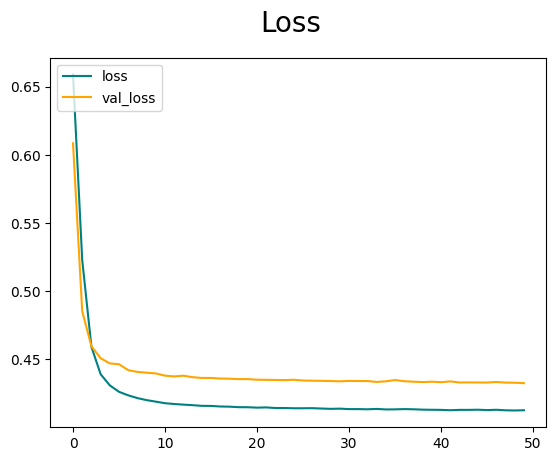

In [38]:
plot_performance(hist)

In [39]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



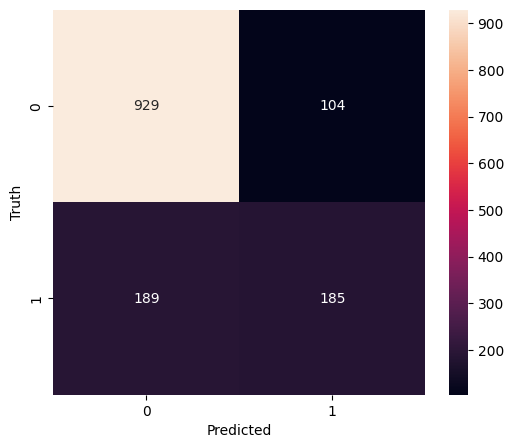

In [40]:
confusion_matrix(y_test, y_pred)

### Let us try improving our model

In [41]:
y_test.value_counts()

Churn
0    1033
1     374
Name: count, dtype: int64

In [42]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

### We can see that there is imbalance in data, i.e. the number of samples with 0 churn is way more.

In [43]:
count_class_0, count_class_1 = df2.Churn.value_counts()

#Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [44]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [45]:
df_class_0_under = df_class_0.sample(count_class_1) 
#Extracting only that many samples of Churn 0, as much as that of Churn 1

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling')
print(df_test_under.Churn.value_counts())

Random under-sampling
Churn
0    1869
1    1869
Name: count, dtype: int64


In [46]:
X2 = df_test_under.drop('Churn', axis='columns')
y2 = df_test_under['Churn']

from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify = y2)

In [47]:
y_train2.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [48]:
y_pred2, hist2 = ANN(X_train2, y_train2, X_test2, y_test2, 'binary_crossentropy', -1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - 1s 6ms/step - loss: 0.6873 - accuracy: 0.5391 - val_loss: 0.6828 - val_accuracy: 0.5588
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6241 - val_loss: 0.6611 - val_accuracy: 0.6404
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 0.6364 - accuracy: 0.6716 - val_loss: 0.6356 - val_accuracy: 0.6738
Epoch 4/50
94/94 [================

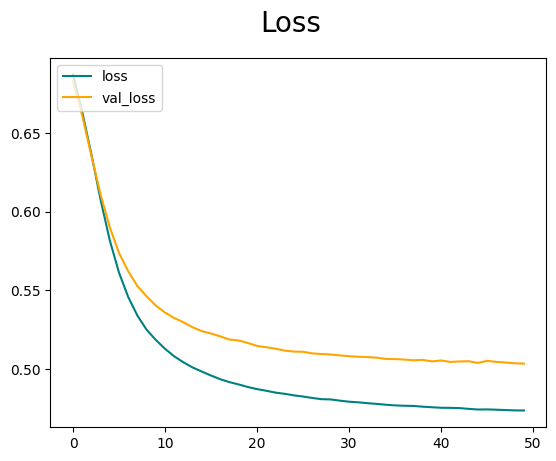

In [49]:
plot_performance(hist2)

In [50]:
print("Classification Report: \n\n", classification_report(y_test2, y_pred2))

Classification Report: 

               precision    recall  f1-score   support

           0       0.76      0.71      0.74       374
           1       0.73      0.78      0.75       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



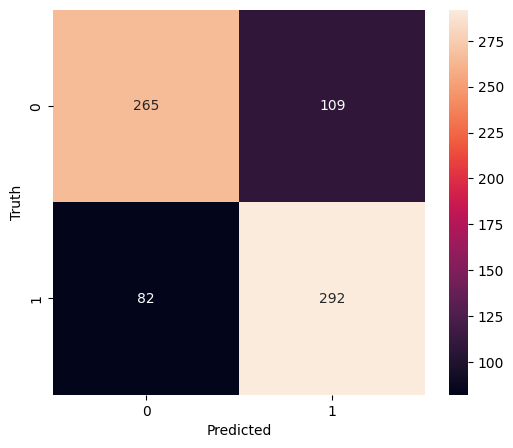

In [51]:
confusion_matrix(y_test2, y_pred2)

#### We can see that the precision and recall has increased for Label 1

### Now let us try oversampling

In [52]:
count_class_0, count_class_1

(5163, 1869)

In [55]:
# Duplicating random samples to increase total count of minority class
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [56]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(10326, 27)

In [57]:
print('Random over-sampling gives us: ')
print(df_test_over.Churn.value_counts())

Random over-sampling gives us: 
Churn
0    5163
1    5163
Name: count, dtype: int64


In [58]:
X3 = df_test_over.drop('Churn', axis='columns')
y3 = df_test_over['Churn']

from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify = y3)

In [60]:
y_train3.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [61]:
y_pred3, hist3 = ANN(X_train3, y_train3, X_test3, y_test3, 'binary_crossentropy', -1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 54        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] - 2s 4ms/step - loss: 0.6912 - accuracy: 0.5024 - val_loss: 0.6683 - val_accuracy: 0.6355
Epoch 2/50
259/259 [==============================] - 1s 4ms/step - loss: 0.6246 - accuracy: 0.7131 - val_loss: 0.5981 - val_accuracy: 0.7372
Epoch 3/50
259/259 [==============================] - 1s 4ms/step - loss: 0.5808 - accuracy: 0.7515 - val_loss: 0.5713 - val_accuracy: 0.7454
Epoch 4/50
259/259 [========

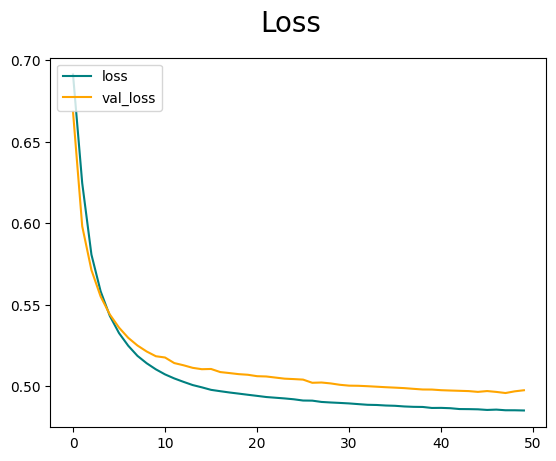

In [62]:
plot_performance(hist3)

In [63]:
print("Classification Report: \n\n", classification_report(y_test3, y_pred3))

Classification Report: 

               precision    recall  f1-score   support

           0       0.80      0.69      0.74      1033
           1       0.73      0.83      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



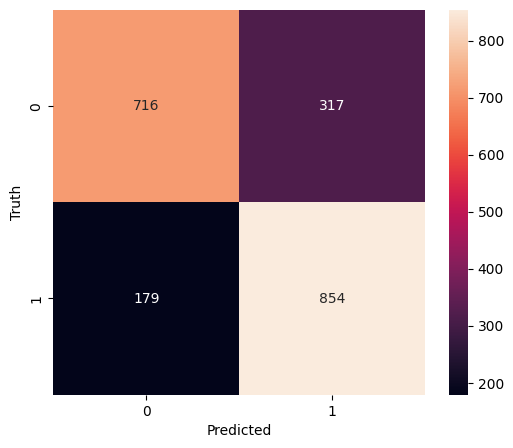

In [65]:
confusion_matrix(y_test3, y_pred3)

#### We can see that the results are somewhat similar to undersampling

## Now we use the 3rd method called SMOTE

#### The most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”

#### SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

#### Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.


<i><b> … SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b. </b> </i>

#### — Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.


In [66]:
X4 = df2.drop('Churn', axis='columns')
y4 = df2['Churn']
X4.shape, y4.shape

((7032, 26), (7032,))

In [67]:
print("Existing samples: ")
print(df2.Churn.value_counts())

Existing samples: 
Churn
0    5163
1    1869
Name: count, dtype: int64


In [68]:
!pip install -U imbalanced-learn

/bin/bash: /home/keshav/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.2 MB/s eta 0:00:001.4 MB/s eta 0:00:01


In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X4, y4)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [73]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [74]:
y_train4.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [75]:
y_test4.value_counts()

Churn
0    1033
1    1033
Name: count, dtype: int64

In [76]:
y_pred4, hist4 = ANN(X_train4, y_train4, X_test4, y_test4, 'binary_crossentropy', -1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 54        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
259/259 [==============================] - 2s 5ms/step - loss: 0.6915 - accuracy: 0.5430 - val_loss: 0.6656 - val_accuracy: 0.6346
Epoch 2/50
259/259 [==============================] - 1s 4ms/step - loss: 0.6326 - accuracy: 0.6893 - val_loss: 0.6076 - val_accuracy: 0.7076
Epoch 3/50
259/259 [==============================] - 1s 3ms/step - loss: 0.5597 - accuracy: 0.7469 - val_loss: 0.5296 - val_accuracy: 0.7352
Epoch 4/50
259/259 [========

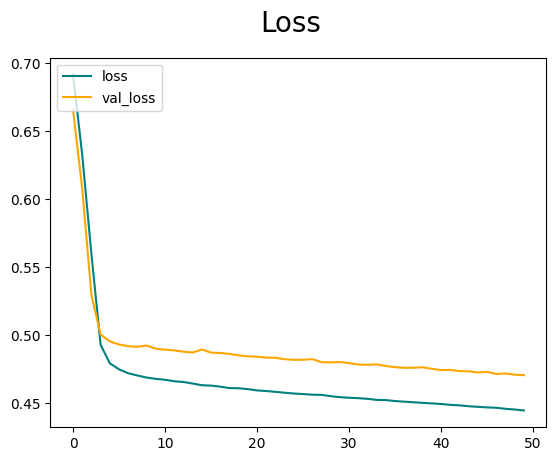

In [77]:
plot_performance(hist4)

In [78]:
print("Classification Report: \n\n", classification_report(y_test4, y_pred4))

Classification Report: 

               precision    recall  f1-score   support

           0       0.79      0.75      0.77      1033
           1       0.76      0.80      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



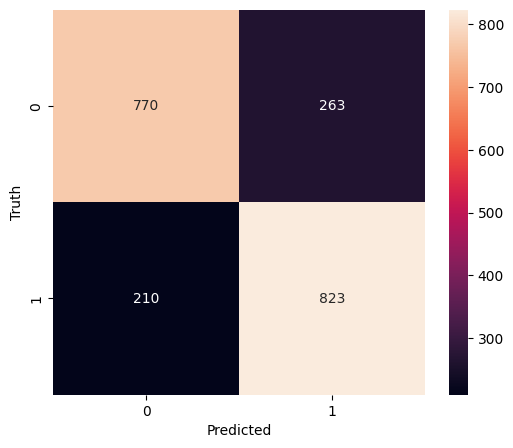

In [79]:
confusion_matrix(y_test4, y_pred4)

### We can see that the results are similar to that of under or oversampling but is slightly better

## Method 4: Use of Ensemble with undersampling

In [80]:
# We may use the original X and y here. 


X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [81]:
y_train.value_counts() # We can see that the imbalance is there

Churn
0    4130
1    1495
Name: count, dtype: int64

In [83]:
df3 = X_train.copy()
df3['Churn'] = y_train
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [84]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [86]:
def get_train_batch(start, end, df3_majority, df3_minority):
    df_train = pd.concat([df3_majority[start:end], df3_minority], axis=0)
    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train['Churn']
    return X_train, y_train

In [89]:
X_train_b1, y_train_b1 = get_train_batch(0, 1495, df3_class0, df3_class1)

X_train_b1.shape, y_train_b1.shape

((2990, 26), (2990,))

In [90]:
y_pred_b1, hist_b1 = ANN(X_train_b1, y_train_b1, X_test5, y_test5, 'binary_crossentropy', -1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 54        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - 1s 7ms/step - loss: 0.6653 - accuracy: 0.6475 - val_loss: 0.6901 - val_accuracy: 0.5849
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.7171 - val_loss: 0.6397 - val_accuracy: 0.6496
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 0.5769 - accuracy: 0.7431 - val_loss: 0.5950 - val_accuracy: 0.6844
Epoch 4/50
94/94 [================

In [92]:
print("Classification Report: \n\n", classification_report(y_test5, y_pred_b1))

Classification Report: 

               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [93]:
X_train_b2, y_train_b2 = get_train_batch(1495, 2990, df3_class0, df3_class1)

X_train_b2.shape, y_train_b2.shape

((2990, 26), (2990,))

In [94]:
y_pred_b2, hist_b2 = ANN(X_train_b2, y_train_b2, X_test5, y_test5, 'binary_crossentropy', -1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 54        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] - 1s 7ms/step - loss: 0.6999 - accuracy: 0.5793 - val_loss: 0.6075 - val_accuracy: 0.6809
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 0.6586 - accuracy: 0.6502 - val_loss: 0.5838 - val_accuracy: 0.6958
Epoch 3/50
94/94 [==============================] - 0s 4ms/step - loss: 0.6291 - accuracy: 0.6843 - val_loss: 0.5468 - val_accuracy: 0.7420
Epoch 4/50
94/94 [================

In [95]:
print("Classification Report: \n\n", classification_report(y_test5, y_pred_b2))

Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.75      0.69      1407
weighted avg       0.79      0.72      0.74      1407



In [96]:
X_train_b3, y_train_b3 = get_train_batch(2990, 4130, df3_class0, df3_class1)

X_train_b3.shape, y_train_b3.shape

((2635, 26), (2635,))

In [97]:
y_pred_b3, hist_b3 = ANN(X_train_b3, y_train_b3, X_test5, y_test5, 'binary_crossentropy', -1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 54        
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
83/83 [==============================] - 1s 7ms/step - loss: 0.7449 - accuracy: 0.4619 - val_loss: 0.6523 - val_accuracy: 0.6297
Epoch 2/50
83/83 [==============================] - 0s 5ms/step - loss: 0.6867 - accuracy: 0.5879 - val_loss: 0.6490 - val_accuracy: 0.6368
Epoch 3/50
83/83 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.6759 - val_loss: 0.6295 - val_accuracy: 0.6930
Epoch 4/50
83/83 [================

In [98]:
print("Classification Report: \n\n", classification_report(y_test5, y_pred_b3))

Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.63      0.75      1033
           1       0.45      0.85      0.59       374

    accuracy                           0.69      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.69      0.71      1407



In [100]:
# Performing majority voting

y_pred_final = y_pred_b1.copy()

for i in range(len(y_pred_b1)):
    n_ones = y_pred_b1[i]+y_pred_b2[i]+y_pred_b3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [101]:
print("Classification Report: \n\n", classification_report(y_test5, y_pred_final))

Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.68      0.78      1033
           1       0.48      0.81      0.60       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407



#### The f1-score for Label 1 has increased but not that much. 

## We can conclude that SMOTE works best for our case. 